# Networkx - Group 8

**Members:**

Almendrala, Aaron

Ambata, Jo Simon

Caguioa, JV

Duque, Denzel

# Mention 5 applications of network

1. Running Errands 

2. Jungle Pathing in League of Legends

3. Among Us Task Management

4. Grab Driver's Pool Drive Pathing (Waze - Add Stops)

5. Internet Routing


# Applying Networkx to Contact Tracing

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("contact_tracing.xlsx")
data

,person,confirmed_covid,with_symptoms,age,health_condition,contact,contact_type
0,p1,True,common,55,diabetes,p2;p3;p4;p5;p6;p10;p11;p15;,family;family;family;colleague;colleague;colle...
1,p2,False,none,19,none,p1;p3;p4;p14;,family;family;family;schoolmate;
2,p3,False,none,67,lung_disease,p1;p2;p4;,family;family;family;
3,p4,False,none,24,none,p1;p2;p3;p12;,family;family;family;colleague;
4,p5,True,common,38,lung_disease,p1;p7;,colleague;colleague;
5,p6,True,common,45,diabetes,p1;p10;p11;p15;,colleague;colleague;colleague;colleague;
6,p7,False,common,35,none,p5;p8;p9;,colleague;family;family;
7,p8,False,none,34,diabetes,p7;p9;,family;family;
8,p9,False,none,8,immunocompromised,p7;p8;p18;,family;family;schoolmate;
9,p10,False,none,28,none,p1;p6;p11;p15;,colleague;colleague;colleague;colleague;


# Contact Tracing

In [3]:
def get_weight(df, a):
    if(df['contact_type'].split(';')[a] == 'family'):
        return 1
    elif (df['contact_type'].split(';')[a] == 'colleague' or df['contact_type'].split(';')[a] == 'schoolmate'):
        if(df['health_condition'] != "none" or df['with_symptoms'] != "none" ):
            return 2
        else:
            if(df['age'] >= 39):
                return 3
            else:
                return 4

In [4]:
type(get_weight(data.iloc[1], 3))

int

In [5]:
data

,person,confirmed_covid,with_symptoms,age,health_condition,contact,contact_type
0,p1,True,common,55,diabetes,p2;p3;p4;p5;p6;p10;p11;p15;,family;family;family;colleague;colleague;colle...
1,p2,False,none,19,none,p1;p3;p4;p14;,family;family;family;schoolmate;
2,p3,False,none,67,lung_disease,p1;p2;p4;,family;family;family;
3,p4,False,none,24,none,p1;p2;p3;p12;,family;family;family;colleague;
4,p5,True,common,38,lung_disease,p1;p7;,colleague;colleague;
5,p6,True,common,45,diabetes,p1;p10;p11;p15;,colleague;colleague;colleague;colleague;
6,p7,False,common,35,none,p5;p8;p9;,colleague;family;family;
7,p8,False,none,34,diabetes,p7;p9;,family;family;
8,p9,False,none,8,immunocompromised,p7;p8;p18;,family;family;schoolmate;
9,p10,False,none,28,none,p1;p6;p11;p15;,colleague;colleague;colleague;colleague;


In [6]:
graph = nx.Graph()
#add nodes
node_list = []
for i in range(len(data)):
    node_list.append(data['person'][i])

y = 0
for x in range(len(data)):
    if(x>=5):
        graph.add_node(data['person'][x],pos=(x%5,y))
    else:
        graph.add_node(data['person'][x],pos=(x,y))
        
    if(x>1 and (x+1)%5 == 0):
        y = y + 1

#G.add_node(3,pos=(1,0))
#add edges
for i in range(len(data)):
    contact = data['contact'][i].split(';')
    contact = contact[:-1]
    #print(contact)
    for j in range(len(contact)):
        graph.add_edge(node_list[i], contact[j], weight = get_weight(data.iloc[i],j))

{('p1', 'p2'): Text(0.5, 0.0, '1'),
 ('p1', 'p3'): Text(1.0, 0.0, '1'),
 ('p1', 'p4'): Text(1.5, 0.0, '1'),
 ('p1', 'p5'): Text(2.0, 0.0, '2'),
 ('p1', 'p6'): Text(0.0, 0.5, '2'),
 ('p1', 'p10'): Text(2.0, 0.5, '4'),
 ('p1', 'p11'): Text(0.0, 1.0, '2'),
 ('p1', 'p15'): Text(2.0, 1.0, '2'),
 ('p2', 'p3'): Text(1.5, 0.0, '1'),
 ('p2', 'p4'): Text(2.0, 0.0, '1'),
 ('p2', 'p14'): Text(2.0, 1.0, '2'),
 ('p3', 'p4'): Text(2.5, 0.0, '1'),
 ('p4', 'p12'): Text(2.0, 1.0, '2'),
 ('p5', 'p7'): Text(2.5, 0.5, '2'),
 ('p6', 'p10'): Text(2.0, 1.0, '4'),
 ('p6', 'p11'): Text(0.0, 1.5, '2'),
 ('p6', 'p15'): Text(2.0, 1.5, '2'),
 ('p7', 'p8'): Text(1.5, 1.0, '1'),
 ('p7', 'p9'): Text(2.0, 1.0, '1'),
 ('p8', 'p9'): Text(2.5, 1.0, '1'),
 ('p9', 'p18'): Text(2.5, 2.0, '4'),
 ('p10', 'p11'): Text(2.0, 1.5, '2'),
 ('p10', 'p15'): Text(4.0, 1.5, '2'),
 ('p11', 'p15'): Text(2.0, 2.0, '2'),
 ('p12', 'p16'): Text(0.5, 2.5, '2'),
 ('p12', 'p17'): Text(1.0, 2.5, '2'),
 ('p13', 'p14'): Text(2.5, 2.0, '1'),
 ('p13'

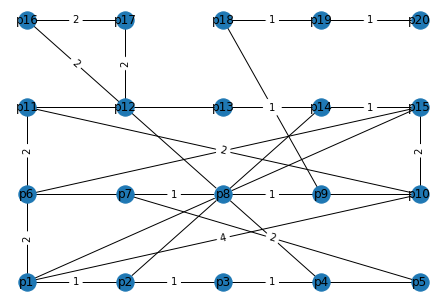

In [7]:
pos=nx.get_node_attributes(graph,'pos')
nx.draw(graph,pos, with_labels=True)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
#plt.savefig("CT_graph.png")

In [8]:
data

,person,confirmed_covid,with_symptoms,age,health_condition,contact,contact_type
0,p1,True,common,55,diabetes,p2;p3;p4;p5;p6;p10;p11;p15;,family;family;family;colleague;colleague;colle...
1,p2,False,none,19,none,p1;p3;p4;p14;,family;family;family;schoolmate;
2,p3,False,none,67,lung_disease,p1;p2;p4;,family;family;family;
3,p4,False,none,24,none,p1;p2;p3;p12;,family;family;family;colleague;
4,p5,True,common,38,lung_disease,p1;p7;,colleague;colleague;
5,p6,True,common,45,diabetes,p1;p10;p11;p15;,colleague;colleague;colleague;colleague;
6,p7,False,common,35,none,p5;p8;p9;,colleague;family;family;
7,p8,False,none,34,diabetes,p7;p9;,family;family;
8,p9,False,none,8,immunocompromised,p7;p8;p18;,family;family;schoolmate;
9,p10,False,none,28,none,p1;p6;p11;p15;,colleague;colleague;colleague;colleague;


# Minimum Spanning Tree

In [9]:
from networkx.algorithms import tree

kruskal_mst=nx.minimum_spanning_edges(graph, algorithm="kruskal", data=False)
kruskal_edgelist=list(kruskal_mst)
print("\033[1mKruskal:\033[0m\n",kruskal_edgelist)


prim_mst=nx.minimum_spanning_edges(graph, algorithm="prim", data=False)
prim_edgelist=list(prim_mst)
print("\n\033[1mPrim:\033[0m\n",prim_edgelist)


Kruskal:
 [('p1', 'p2'), ('p1', 'p3'), ('p1', 'p4'), ('p7', 'p8'), ('p7', 'p9'), ('p13', 'p14'), ('p13', 'p15'), ('p18', 'p19'), ('p18', 'p20'), ('p1', 'p5'), ('p1', 'p6'), ('p1', 'p11'), ('p1', 'p15'), ('p4', 'p12'), ('p5', 'p7'), ('p10', 'p11'), ('p12', 'p16'), ('p12', 'p17'), ('p9', 'p18')]

Prim:
 [('p5', 'p1'), ('p1', 'p2'), ('p1', 'p3'), ('p1', 'p4'), ('p5', 'p7'), ('p7', 'p8'), ('p7', 'p9'), ('p1', 'p6'), ('p1', 'p11'), ('p1', 'p15'), ('p15', 'p13'), ('p15', 'p14'), ('p4', 'p12'), ('p11', 'p10'), ('p12', 'p16'), ('p12', 'p17'), ('p9', 'p18'), ('p18', 'p19'), ('p18', 'p20')]


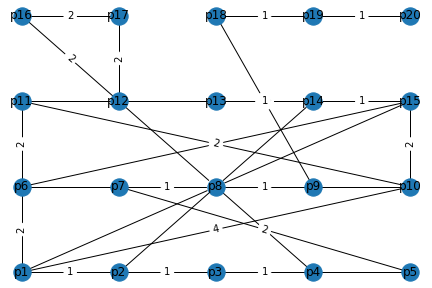

In [10]:
from IPython.display import Image
Image(filename='CT_graph.png') 

# Applying Networkx to Chauffering

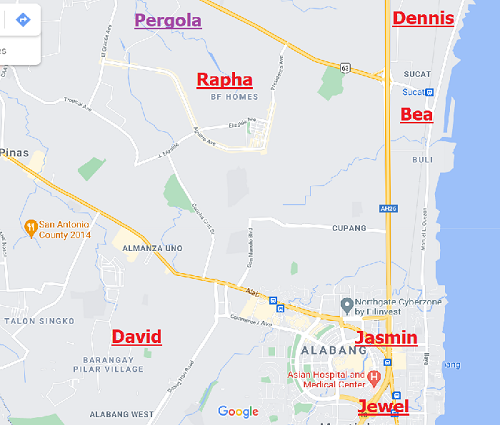

In [11]:
Image(filename='Hatid.png') 

# Going to Pergola Mall - Distance Only

In [12]:
data = pd.read_excel("usher_friends.xlsx")
data

,person,strict_parents,pathing,distance,location
0,jewel,no,jasmin;david;,2;10;,munti_camella
1,dennis,yes,bea;raphael;Pergola;,12;13;11;,taguig
2,bea,yes,dennis;jasmin;raphael;,12;5;6;,sucat
3,jasmin,no,david;bea;jewel;,7;5;2;,munti_mutual
4,raphael,no,dennis;david;bea;Pergola;,13;5;6;5;,bf_homes
5,david,no,jasmin;jewel;raphael;,7;10;5;,las pinas
6,Pergola,no,dennis;raphael;,11;5;,aguirre


In [13]:
graph = nx.Graph()
#add nodes
node_list = []
for i in range(len(data)):
    node_list.append(data['person'][i])

graph.add_node(data['person'][0],pos=(1,0))
graph.add_node(data['person'][1],pos=(1,3))
graph.add_node(data['person'][2],pos=(1,2))
graph.add_node(data['person'][3],pos=(1,1))
graph.add_node(data['person'][4],pos=(0,2))
graph.add_node(data['person'][5],pos=(0,1))
graph.add_node(data['person'][6],pos=(0,3))

#G.add_node(3,pos=(1,0))
#add edges
for i in range(len(data)):
    pathing = data['pathing'][i].split(';')[:-1]
    distance = data['distance'][i].split(';')[:-1]
    #print(pathing)
    #print(distance)
    for j in range(len(pathing)):
        graph.add_edge(node_list[i], pathing[j], weight = int(distance[j]))

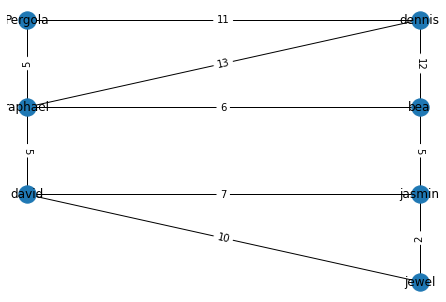

In [14]:
pos=nx.get_node_attributes(graph,'pos')
nx.draw(graph,pos, with_labels=True)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
plt.savefig("chauffer_distance.png")

**Using Dijkstra's path algorithm find the shortest path to Pergola mall**

In [15]:
dp_node_to_mall = nx.dijkstra_path(graph, source='jewel', target='Pergola',weight='weight')

print("Dijkstra's Path: ", end = '')
for x in dp_node_to_mall:
    if(x != dp_node_to_mall[-1]):
        print(x, '-> ', end = '')
    else:
        print(x)

print("Dijkstra's Path length:",nx.dijkstra_path_length(graph, source='jewel', target='Pergola',weight='weight'))

Dijkstra's Path: jewel -> jasmin -> bea -> raphael -> Pergola
Dijkstra's Path length: 18


**Using Depth First Search to visit every node**

In [16]:
dfs_node_to_mall = list(nx.dfs_preorder_nodes(graph, source='jewel'))

print("Depth First Search: ", end = '')
for x in dfs_node_to_mall:
    if(x != dfs_node_to_mall[-1]):
        print(x, '-> ', end = '')
    else:
        print(x)

Depth First Search: jewel -> jasmin -> bea -> dennis -> raphael -> david -> Pergola


# Going home from Pergola Mall - DIstance Only

**Using Dijkstra's Path to determine the cost for each node**

In [17]:
dp_mall_to_node = nx.single_source_dijkstra_path(graph, source='Pergola',weight='weight')
dp_cost_dp_mall_to_node =nx.single_source_dijkstra_path_length(graph, source='Pergola',weight='weight')

for k, v in dp_mall_to_node.items():
    print('Destination: {key}\nPath: {values}\nPath cost: {cost}\n'.format(key=k, 
                                                                values=', '.join('{}'.format(', '.join(x.split())) for x in v),
                                                                cost=dp_cost_dp_mall_to_node[k]))
        

Destination: Pergola
Path: Pergola
Path cost: 0

Destination: dennis
Path: Pergola, dennis
Path cost: 11

Destination: raphael
Path: Pergola, raphael
Path cost: 5

Destination: bea
Path: Pergola, raphael, bea
Path cost: 11

Destination: david
Path: Pergola, raphael, david
Path cost: 10

Destination: jewel
Path: Pergola, raphael, bea, jasmin, jewel
Path cost: 18

Destination: jasmin
Path: Pergola, raphael, bea, jasmin
Path cost: 16



# Going to Pergola Mall - Distance and Strict Parents

In [18]:
def get_priority(state1, state2, distance):
    if(state1 == "yes" or state2 == "yes"): #they have strict parents
        return 15
    else:
        return distance

In [19]:
data = pd.read_excel("usher_friends.xlsx")
data

,person,strict_parents,pathing,distance,location
0,jewel,no,jasmin;david;,2;10;,munti_camella
1,dennis,yes,bea;raphael;Pergola;,12;13;11;,taguig
2,bea,yes,dennis;jasmin;raphael;,12;5;6;,sucat
3,jasmin,no,david;bea;jewel;,7;5;2;,munti_mutual
4,raphael,no,dennis;david;bea;Pergola;,13;5;6;5;,bf_homes
5,david,no,jasmin;jewel;raphael;,7;10;5;,las pinas
6,Pergola,no,dennis;raphael;,11;5;,aguirre


In [20]:
graph = nx.Graph()
#add nodes
node_list = []
for i in range(len(data)):
    node_list.append(data['person'][i])

graph.add_node(data['person'][0],pos=(1,0))
graph.add_node(data['person'][1],pos=(1,3))
graph.add_node(data['person'][2],pos=(1,2))
graph.add_node(data['person'][3],pos=(1,1))
graph.add_node(data['person'][4],pos=(0,2))
graph.add_node(data['person'][5],pos=(0,1))
graph.add_node(data['person'][6],pos=(0,3))

#G.add_node(3,pos=(1,0))
#add edges
for i in range(len(data)):
    pathing = data['pathing'][i].split(';')[:-1]
    distance = data['distance'][i].split(';')[:-1]
    
    print("For Node List:",node_list[i])
    print(pathing)
    print(distance)
    for j in range(len(pathing)): 
        print("strict:",data['strict_parents'][i])
        graph.add_edge(node_list[i], pathing[j], weight = get_priority(data['strict_parents'][i] , data['strict_parents'][data[data['person']== pathing[j]].index.values[0]] , int(distance[j])))
        print("pathj:",data['strict_parents'][data[data['person']== pathing[j]].index.values[0]])
        print("weight:",get_priority(data['strict_parents'][i] , data['strict_parents'][data[data['person']== pathing[j]].index.values[0]] ,int(distance[j])))
        print(" ")
    print("=========================================")

For Node List: jewel
['jasmin', 'david']
['2', '10']
strict: no
pathj: no
weight: 2
 
strict: no
pathj: no
weight: 10
 
For Node List: dennis
['bea', 'raphael', 'Pergola']
['12', '13', '11']
strict: yes
pathj: yes
weight: 15
 
strict: yes
pathj: no
weight: 15
 
strict: yes
pathj: no
weight: 15
 
For Node List: bea
['dennis', 'jasmin', 'raphael']
['12', '5', '6']
strict: yes
pathj: yes
weight: 15
 
strict: yes
pathj: no
weight: 15
 
strict: yes
pathj: no
weight: 15
 
For Node List: jasmin
['david', 'bea', 'jewel']
['7', '5', '2']
strict: no
pathj: no
weight: 7
 
strict: no
pathj: yes
weight: 15
 
strict: no
pathj: no
weight: 2
 
For Node List: raphael
['dennis', 'david', 'bea', 'Pergola']
['13', '5', '6', '5']
strict: no
pathj: yes
weight: 15
 
strict: no
pathj: no
weight: 5
 
strict: no
pathj: yes
weight: 15
 
strict: no
pathj: no
weight: 5
 
For Node List: david
['jasmin', 'jewel', 'raphael']
['7', '10', '5']
strict: no
pathj: no
weight: 7
 
strict: no
pathj: no
weight: 10
 
strict: n

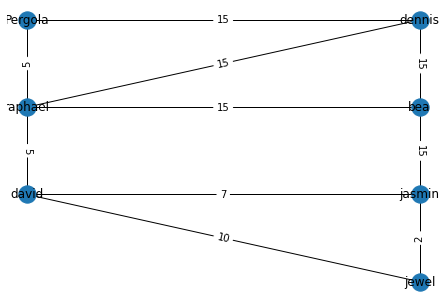

In [21]:
pos=nx.get_node_attributes(graph,'pos')
nx.draw(graph,pos, with_labels=True)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
plt.savefig("chauffer_distance_strict.png")

**Using Dijkstra's path algorithm find the shortest path to Pergola mall**

In [22]:
dp_strict_node_to_mall = nx.dijkstra_path(graph, source='jewel', target='Pergola',weight='weight')

print("Dijkstra's Path: ", end = '')
for x in dp_strict_node_to_mall:
    if(x != dp_node_to_mall[-1]):
        print(x, '-> ', end = '')
    else:
        print(x)

print("Dijkstra's Path length:",nx.dijkstra_path_length(graph, source='jewel', target='Pergola',weight='weight'))

Dijkstra's Path: jewel -> jasmin -> david -> raphael -> Pergola
Dijkstra's Path length: 19


**Using Depth First Search to visit every node**

In [23]:
dfs_strict_node_to_mall = list(nx.dfs_preorder_nodes(graph, source='jewel'))

print("Depth First Search: ", end = '')
for x in dfs_strict_node_to_mall:
    if(x != dfs_strict_node_to_mall[-1]):
        print(x, '-> ', end = '')
    else:
        print(x)

Depth First Search: jewel -> jasmin -> bea -> dennis -> raphael -> david -> Pergola


# Going home from Pergola Mall - DIstance and Stict Parents

**Using Dijkstra's Path to determine the cost for each node**

In [24]:
dp_strict_mall_to_node = nx.single_source_dijkstra_path(graph, source='Pergola',weight='weight')
dp_strict_cost_dp_mall_to_node =nx.single_source_dijkstra_path_length(graph, source='Pergola',weight='weight')

for k, v in dp_mall_to_node.items():
    print('Destination: {key}\nPath: {values}\nPath cost: {cost}\n'.format(key=k, 
                                                                values=', '.join('{}'.format(', '.join(x.split())) for x in v),
                                                                cost=dp_strict_cost_dp_mall_to_node[k]))
        

Destination: Pergola
Path: Pergola
Path cost: 0

Destination: dennis
Path: Pergola, dennis
Path cost: 15

Destination: raphael
Path: Pergola, raphael
Path cost: 5

Destination: bea
Path: Pergola, raphael, bea
Path cost: 20

Destination: david
Path: Pergola, raphael, david
Path cost: 10

Destination: jewel
Path: Pergola, raphael, bea, jasmin, jewel
Path cost: 19

Destination: jasmin
Path: Pergola, raphael, bea, jasmin
Path cost: 17

